In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f" Most Recent Date: {latest_date}")

 Most Recent Date: ('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation).set_index('date')


# Sort the dataframe by date
#precipitation_df.rename(columns = {'prcp':'precipitation'}, inplace = True)
precipitation_df=precipitation_df.sort_values(by = 'date').dropna()

precipitation_df.head()




,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


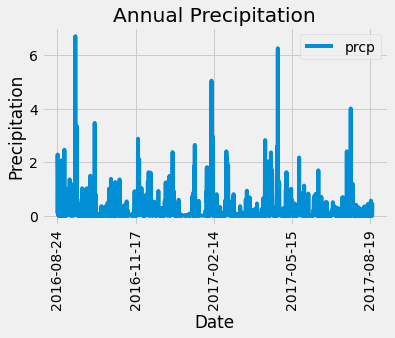

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(use_index=True)
plt.title('Annual Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print(f' There are {station_count} stations in the dataset.')

 There are 9 stations in the dataset.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
print(f'The most active station is: {most_active}.')
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()


The most active station is: USC00519281.


[(54.0, 85.0, 71.66378066378067)]

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').filter(Measurement.station == most_active).order_by(Measurement.date).all())

temperature_df = pd.DataFrame(station_temp).set_index('date')
temperature_df.head()


,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


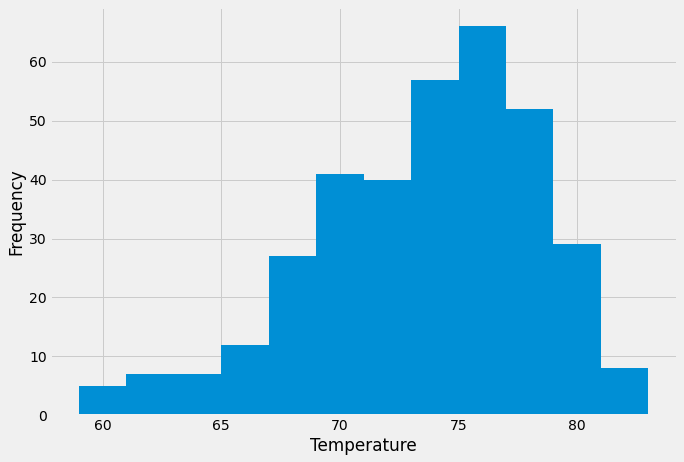

In [43]:
#temperature_df.plot(use_index=True)
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(temperature_df['tobs'], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

#plt.hist('tobs')
plt.show()

# Close session

In [44]:
# Close Session
session.close()